In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import a csv file to dataframe

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [148]:

orders = pd.read_csv("/content/drive/MyDrive/clean_eniac_data/orders_cl.csv")
brands = pd.read_csv("/content/drive/MyDrive/clean_eniac_data/brands_cl.csv")
orderlines = pd.read_csv("/content/drive/MyDrive/clean_eniac_data/orderlines_cl.csv")
products = pd.read_csv("/content/drive/MyDrive/clean_eniac_data/products_cl.csv")

# Dataframes exploration

In [149]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204691 entries, 0 to 204690
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      204691 non-null  int64  
 1   created_date  204691 non-null  object 
 2   total_paid    204691 non-null  float64
 3   state         204691 non-null  object 
 4   check_orders  204691 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 6.4+ MB


In [150]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [151]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293743 non-null  int64  
 1   id_order          293743 non-null  int64  
 2   product_id        293743 non-null  int64  
 3   product_quantity  293743 non-null  int64  
 4   sku               293743 non-null  object 
 5   unit_price        293743 non-null  float64
 6   date              293743 non-null  object 
 7   total_price       293743 non-null  float64
 8   check_orders      293743 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 18.2+ MB


In [152]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sku                   10579 non-null  object 
 1   name                  10579 non-null  object 
 2   desc                  10572 non-null  object 
 3   price                 9992 non-null   float64
 4   type                  10529 non-null  object 
 5   max_price_orderlines  342 non-null    float64
dtypes: float64(2), object(4)
memory usage: 496.0+ KB


Check missing values 


In [153]:
products.isna().sum()

sku                         0
name                        0
desc                        7
price                     587
type                       50
max_price_orderlines    10237
dtype: int64

In [154]:
products.isna().sum().sum()

10881

In [155]:
products.head()

,sku,name,desc,price,type,max_price_orderlines
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,NaN


In [156]:
pd.set_option('display.max_rows', 100)
products.head(100)

,sku,name,desc,price,type,max_price_orderlines
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1364,NaN
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,1230,NaN
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,18.99,1364,NaN
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,1364,NaN
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO...,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) Ma...,74.00,1364,NaN
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and M...,35.00,1325,NaN


In [157]:
from collections import Counter

count_name = (Counter(products['name']).most_common(500))
count_name 

[('Synology DS216 + II | Seagate 4TB IronWolf for Mac and PC', 13),
 ('QNAP TS-231P NAS', 12),
 ('QNAP TS-431P NAS', 12),
 ('Pack Synology DS1515 + | WD 30TB Network', 11),
 ('Synology DS216 + II | WD 4TB Network for Mac and PC', 9),
 ('Second hand - Apple iMac 20 "Core 2 Duo 226GHz | 2GB RAM | 160GB HDD', 9),
 ('Pack QNAP TS-451A NAS 8GB RAM l l 32TB (4x8TB) WD Red', 6),
 ('Pack QNAP TS-251 + | 2GB RAM | Seagate NAS 16TB', 4),
 ('Pack QNAP TS-451 + | 8GB RAM | Seagate NAS 32TB', 4),
 ('Pack QNAP TS-253A | 4G RAM | 6TB Seagate Desktop', 4),
 ('Synology Pack DS216SE | Seagate 8TB NAS', 3),
 ('Pack QNAP TS-451A NAS 8GB RAM l l 40TB (4x10TB) Seagate IronWolf', 3),
 ('Second hand - Apple iMac 215 "Core i5 Quad-Core 27GHz | 8GB RAM | 1TB HDD',
  3),
 ('Second hand - Apple iMac 215 "Core i5 Quad-Core 25GHz | 4GB RAM | 1TB HDD',
  3),
 ('Open - Apple iPhone 7128 GB Black - Like New', 3),
 ('Second hand - Apple iMac 20 "Core 2 Duo 266GHz | 4GB RAM | 500GB HDD', 3),
 ('Second hand - Apple iMac 

# New Section

In [158]:
# required columns 
orders.rename(columns = {'order_id':'id_order'}, inplace = True)
table_merge = orders.merge(orderlines, how= 'inner', on = 'id_order').merge(products, how = 'inner', on ='sku')
table_merge['created_date'] =pd.to_datetime(table_merge['created_date'])
table_merge['date'] =pd.to_datetime(table_merge['date'])
new_table = table_merge.filter(["total_price","state","date", "unit_price", "price"])
new_table.info()
new_table


<class 'pandas.core.frame.DataFrame'>
Int64Index: 292328 entries, 0 to 292327
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   total_price  292328 non-null  float64       
 1   state        292328 non-null  object        
 2   date         292328 non-null  datetime64[ns]
 3   unit_price   292328 non-null  float64       
 4   price        285001 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 13.4+ MB


,total_price,state,date,unit_price,price
0,44.99,Cancelled,2017-01-02 12:26:59,44.99,49.95
1,44.99,Shopping Basket,2017-01-01 23:03:40,44.99,49.95
2,44.99,Shopping Basket,2017-01-02 18:45:15,44.99,49.95
3,44.99,Shopping Basket,2017-01-02 20:11:11,44.99,49.95
4,44.99,Cancelled,2017-01-03 01:31:12,44.99,49.95
...,...,...,...,...,...
292323,48.68,Pending,2018-03-14 12:57:52,48.68,79.95
292324,186.99,Shopping Basket,2018-03-14 11:36:03,186.99,199.00
292325,186.99,Place Order,2018-03-14 12:38:59,186.99,199.00
292326,80.99,Place Order,2018-03-14 12:57:54,80.99,84.99


In [159]:

completed_cat = new_table.loc[new_table["state"] == "Completed"] 

completed_cat

,total_price,state,date,unit_price,price
5,44.99,Completed,2017-01-10 00:27:30,44.99,49.95
6,44.99,Completed,2017-01-04 12:02:40,44.99,49.95
11,44.99,Completed,2017-01-23 07:37:06,44.99,49.95
13,37.18,Completed,2017-01-27 00:16:45,37.18,49.95
16,85.48,Completed,2017-01-31 21:44:05,42.74,49.95
...,...,...,...,...,...
292294,46.85,Completed,2018-03-11 20:55:56,46.85,79.99
292301,439.99,Completed,2018-03-12 10:41:22,439.99,458.99
292302,35.09,Completed,2018-03-12 13:37:34,35.09,59.99
292303,404.99,Completed,2018-03-12 15:59:19,404.99,429.99


# Categories according to price 

low price product = 0 - 100, 

Middel price product = 101 - 1000,

High price product = 1001 - 5000,

High end product = < 5000 

In [160]:
low = completed_cat.query("total_price <= 100")
low.count()


total_price    36675
state          36675
date           36675
unit_price     36675
price          35994
dtype: int64

In [161]:
middel = completed_cat.query("`total_price` >= 100 and `total_price` <= 1000")
middel.count()

total_price    21342
state          21342
date           21342
unit_price     21342
price          20883
dtype: int64

In [162]:
high = completed_cat.query("`total_price` >= 1000 and `total_price` <= 5000")
high.count()

total_price    3689
state          3689
date           3689
unit_price     3689
price          3462
dtype: int64

In [163]:
end_high = completed_cat.query("total_price >= 5000")
end_high.count()

total_price    36
state          36
date           36
unit_price     36
price          36
dtype: int64

In [164]:

completed_cat['category'] = ''
completed_cat['category'] = completed_cat.total_price.apply(lambda x: 'low' if x <= 100 else 'middle' if x <=1000 else 'high' if x <= 5000 else 'high_end')
completed_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_price,state,date,unit_price,price,category
5,44.99,Completed,2017-01-10 00:27:30,44.99,49.95,low
6,44.99,Completed,2017-01-04 12:02:40,44.99,49.95,low
11,44.99,Completed,2017-01-23 07:37:06,44.99,49.95,low
13,37.18,Completed,2017-01-27 00:16:45,37.18,49.95,low
16,85.48,Completed,2017-01-31 21:44:05,42.74,49.95,low
...,...,...,...,...,...,...
292294,46.85,Completed,2018-03-11 20:55:56,46.85,79.99,low
292301,439.99,Completed,2018-03-12 10:41:22,439.99,458.99,middle
292302,35.09,Completed,2018-03-12 13:37:34,35.09,59.99,low
292303,404.99,Completed,2018-03-12 15:59:19,404.99,429.99,middle


In [165]:

completed_cat['date'] = pd.to_datetime(completed_cat['date'])
completed_cat['year_month'] = completed_cat['date'].dt.strftime('%Y-%m')

completed_cat.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_price,state,date,unit_price,price,category,year_month
5,44.99,Completed,2017-01-10 00:27:30,44.99,49.95,low,2017-01
6,44.99,Completed,2017-01-04 12:02:40,44.99,49.95,low,2017-01
11,44.99,Completed,2017-01-23 07:37:06,44.99,49.95,low,2017-01
13,37.18,Completed,2017-01-27 00:16:45,37.18,49.95,low,2017-01
16,85.48,Completed,2017-01-31 21:44:05,42.74,49.95,low,2017-01
17,44.99,Completed,2017-02-03 10:44:49,44.99,49.95,low,2017-02
31,44.99,Completed,2017-05-05 11:31:41,44.99,49.95,low,2017-05
37,39.99,Completed,2017-05-19 08:52:52,39.99,49.95,low,2017-05
39,39.99,Completed,2017-05-19 10:27:43,39.99,49.95,low,2017-05
50,39.99,Completed,2017-06-30 16:59:08,39.99,49.95,low,2017-06


In [166]:
# calulated discount 
cal_disc = (
    completed_cat.assign(discount = lambda x: x['price'] - x['unit_price'])
    )
cal_disc

,total_price,state,date,unit_price,price,category,year_month,discount
5,44.99,Completed,2017-01-10 00:27:30,44.99,49.95,low,2017-01,4.96
6,44.99,Completed,2017-01-04 12:02:40,44.99,49.95,low,2017-01,4.96
11,44.99,Completed,2017-01-23 07:37:06,44.99,49.95,low,2017-01,4.96
13,37.18,Completed,2017-01-27 00:16:45,37.18,49.95,low,2017-01,12.77
16,85.48,Completed,2017-01-31 21:44:05,42.74,49.95,low,2017-01,7.21
...,...,...,...,...,...,...,...,...
292294,46.85,Completed,2018-03-11 20:55:56,46.85,79.99,low,2018-03,33.14
292301,439.99,Completed,2018-03-12 10:41:22,439.99,458.99,middle,2018-03,19.00
292302,35.09,Completed,2018-03-12 13:37:34,35.09,59.99,low,2018-03,24.90
292303,404.99,Completed,2018-03-12 15:59:19,404.99,429.99,middle,2018-03,25.00


In [167]:
cal_disc.max()

total_price               13387.77
state                    Completed
date           2018-03-14 11:58:13
unit_price                  8287.8
price                       9799.0
category                    middle
year_month                 2018-03
discount                    1511.2
dtype: object

In [168]:
cal_disc.min()

total_price                   0.01
state                    Completed
date           2017-01-01 01:46:16
unit_price                    0.01
price                         2.99
category                      high
year_month                 2017-01
discount                    -560.1
dtype: object

In [169]:
# discount percentage 
disc_per= (
    cal_disc.assign(discount_perc = lambda x:(x["discount"]/x["price"])*100)
)
disc_per
#completed_cat['percent'] = (completed_cat['discount'] / completed_cat['total_price']) * 100

,total_price,state,date,unit_price,price,category,year_month,discount,discount_perc
5,44.99,Completed,2017-01-10 00:27:30,44.99,49.95,low,2017-01,4.96,9.929930
6,44.99,Completed,2017-01-04 12:02:40,44.99,49.95,low,2017-01,4.96,9.929930
11,44.99,Completed,2017-01-23 07:37:06,44.99,49.95,low,2017-01,4.96,9.929930
13,37.18,Completed,2017-01-27 00:16:45,37.18,49.95,low,2017-01,12.77,25.565566
16,85.48,Completed,2017-01-31 21:44:05,42.74,49.95,low,2017-01,7.21,14.434434
...,...,...,...,...,...,...,...,...,...
292294,46.85,Completed,2018-03-11 20:55:56,46.85,79.99,low,2018-03,33.14,41.430179
292301,439.99,Completed,2018-03-12 10:41:22,439.99,458.99,middle,2018-03,19.00,4.139524
292302,35.09,Completed,2018-03-12 13:37:34,35.09,59.99,low,2018-03,24.90,41.506918
292303,404.99,Completed,2018-03-12 15:59:19,404.99,429.99,middle,2018-03,25.00,5.814089


In [170]:
final_1 = (
disc_per.groupby(['year_month', 'category']).agg({'total_price' : 'sum'})
)
final_1

total_price
year_month category             
2017-01    high        500601.82
           high_end      5577.98
           low         187906.77
           middle      462537.17
2017-02    high        257410.60
           low          77887.53
           middle      266202.09
2017-03    high         73417.94
           high_end     13364.96
           low           7453.75
           middle       21459.72
2017-04    high        235428.40
           low          64498.17
           middle      184983.86
2017-05    high        283971.70
           low          68076.23
           middle      275056.58
2017-06    high        375445.87
           low          51391.72
           middle      255585.15
2017-07    high        463581.95
           high_end     13894.97
           low         114520.00
           middle      520954.07
2017-08    high        295590.36
           high_end     16753.16
           low          81837.63
           middle      317105.65
2017-09    high        444217.15
           high_end      7335.59
           low          71219.70
           middle      331829.64
2017-10    high        483036.58
           high_end     11036.39
           low          97898.86
           middle      480471.71
2017-11    high       1305075.85
           high_end     48638.94
           low         220399.87
           middle     1341267.78
2017-12    high        805817.70
           high_end     27074.46
           low         169696.28
           middle      860937.65
2018-01    high        976642.37
           high_end     55844.47
           low         174871.40
           middle      725285.20
2018-02    high        481842.91
           high_end     15690.28
           low         112954.83
           middle      439610.64
2018-03    high        225989.55
           high_end      5998.00
           low          51095.61
           middle      173785.31

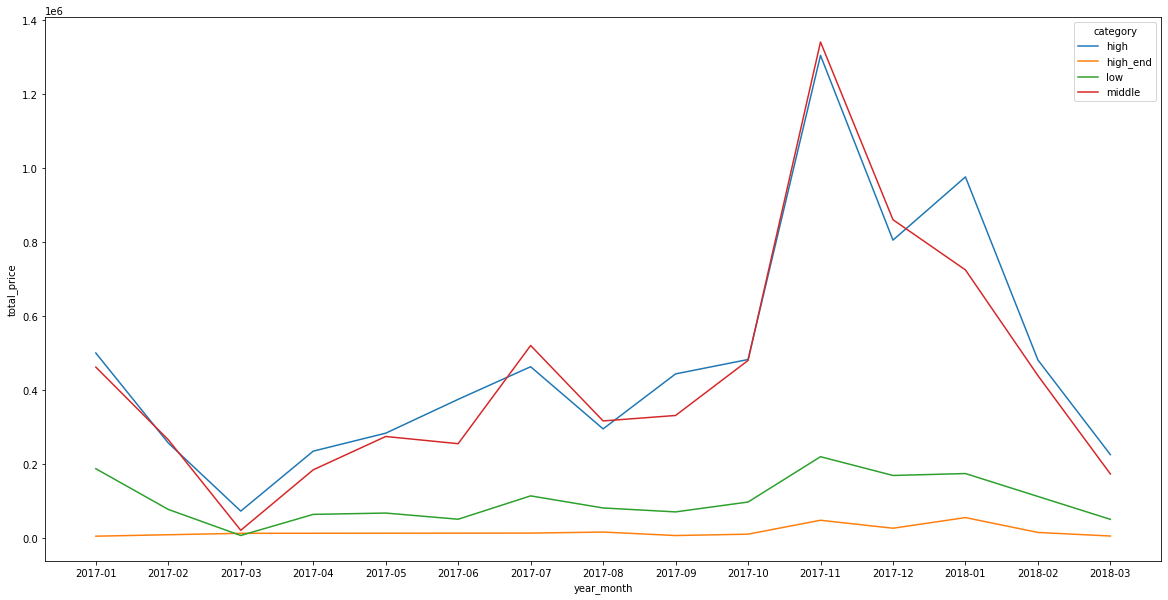

In [171]:

plt.figure(figsize=(20,10))
sns.lineplot(data= final_1,x='year_month',y= 'total_price',hue='category');



In [172]:

final_2 = (
disc_per
    .assign(year = disc_per['date'].dt.strftime('%Y'))
    .groupby(['year', 'category'])
    .agg({'discount_perc':['min','max', 'mean']}) 
 
)
final_2

discount_perc                      
                        min        max       mean
year category                                    
2017 high        -21.412961  40.008002   9.333051
     high_end      4.672836  22.043603  11.495849
     low        -212.265332  99.979996  25.780638
     middle      -81.344179  82.949300  13.784425
2018 high        -13.203562  52.306632   9.362339
     high_end      4.843072  11.970057   6.722439
     low         -39.827966  97.712652  26.522786
     middle      -30.233261  75.207521  14.144058

In [173]:
final_3 = (
disc_per
    .query("`discount_perc` >= 0")
    .assign(year = disc_per['date'].dt.strftime('%Y'))
    .groupby(['category'])
    .agg({'discount_perc':['min','max', 'mean']}) 
 
)
final_3


discount_perc                      
                   min        max       mean
category                                    
high          0.000000  52.306632   9.680801
high_end      4.672836  22.043603   9.639523
low           0.000000  99.979996  26.703349
middle        0.000000  82.949300  14.713617

In [174]:
# calulated avgerage discount 
final_3 = (
disc_per.query("`discount_perc` >= 0")
       .groupby(['year_month', 'category']).agg({'discount_perc' : 'mean'})
)
final_3

discount_perc
year_month category               
2017-01    high          10.466550
           high_end      18.187445
           low           29.819843
           middle        15.377347
2017-02    high           8.281989
           low           24.870698
           middle        14.204308
2017-03    high           9.428331
           high_end       8.481584
           low           25.186532
           middle        11.442320
2017-04    high           8.500172
           low           22.803265
           middle        12.019313
2017-05    high           9.492283
           low           20.066283
           middle        11.992874
2017-06    high           9.083123
           low           21.724902
           middle        14.200838
2017-07    high           9.193685
           high_end      10.399894
           low           31.650967
           middle        15.652563
2017-08    high           9.343624
           high_end      13.571873
           low           25.236732
           middle        15.250332
2017-09    high          12.295372
           high_end      11.072979
           low           25.843540
           middle        14.129717
2017-10    high          10.989781
           high_end      11.878276
           low           28.115709
           middle        14.326926
2017-11    high          10.204141
           high_end      12.334510
           low           27.511302
           middle        16.525377
2017-12    high           8.094651
           high_end       9.481212
           low           24.097189
           middle        13.481374
2018-01    high           9.324035
           high_end       7.016894
           low           26.923617
           middle        14.143358
2018-02    high           9.401070
           high_end       4.890101
           low           27.602228
           middle        14.361104
2018-03    high           9.635252
           high_end       9.274895
           low           25.911869
           middle        15.185471

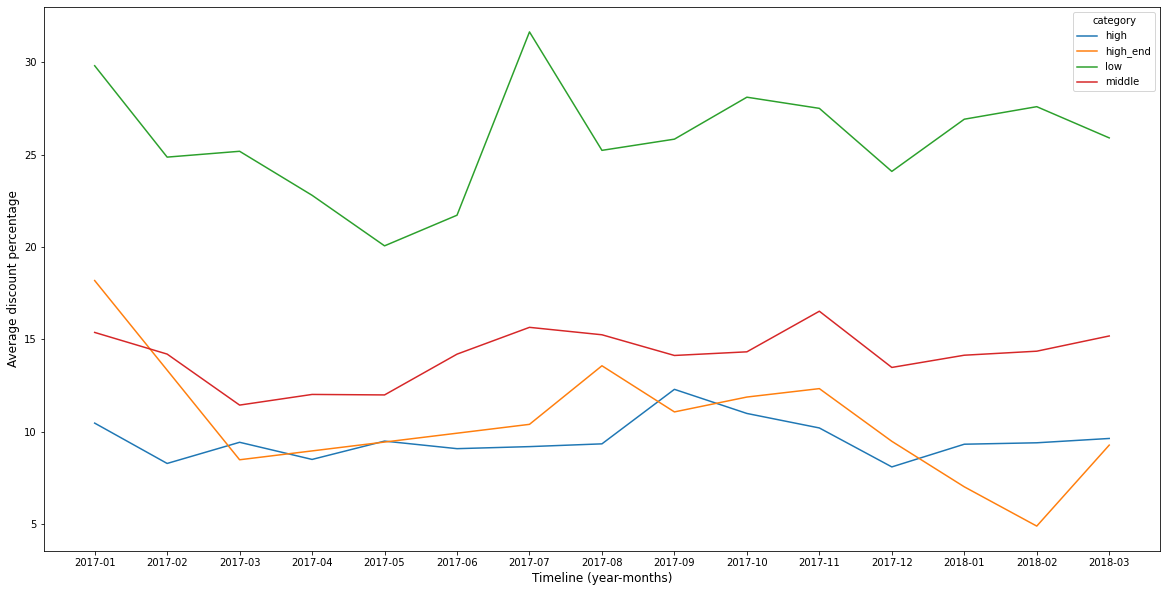

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,10))
sns.lineplot(data= final_3,x='year_month',y= 'discount_perc',hue='category');
plt.xlabel("Timeline (year-months)", fontsize = 12)
plt.ylabel("Average discount percentage", fontsize = 12);
plt.show()
